# Parctica 1: Análisis de algoritmos iterativos

***
Equipo: Arminions

Integrantes:
* García Saavedra Armando
* Mejía Yáñez José Ehécatl
* Rodriguez Nuñez Diego Eduardo

Grupo: 3AM1

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***
## Objetivo de la práctica
> Desarrollar programas de algoritmos con un enfoque iterativo.
* El problema del intervalo de existencias
* Torre iterativa de Hanoi
* Problema de Josefo

***
## Introducción

Características de la estrategia iterativa:
La estrategia iterativa implica dividir un problema en subproblemas más pequeños y abordarlos de manera iterativa, es decir, repetir el mismo proceso varias veces. En general, se trata de una estrategia de solución de problemas muy útil cuando el problema original es demasiado grande o complejo para resolverlo de una sola vez.

Las torres iterativas de Hanoi son una variante del famoso problema de las Torres de Hanoi. A diferencia del algoritmo recursivo convencional que resuelve el problema mediante llamadas recursivas, la solución iterativa utiliza un enfoque iterativo para resolver el problema. La solución iterativa utiliza una pila para almacenar los valores necesarios para realizar los movimientos de los discos, y luego los utiliza para realizar los movimientos correspondientes de manera iterativa. La solución iterativa es generalmente más eficiente en términos de espacio y tiempo que la solución recursiva para entradas grandes

El problema de intervalo de existencias (también conocido como problema de selección de intervalos) es un problema de optimización combinatoria que se utiliza en la gestión de inventario y la planificación de producción.

El problema se plantea así: se tienen varios pedidos de productos que deben ser fabricados o entregados en un cierto intervalo de tiempo. Cada pedido tiene un tiempo de inicio y un tiempo de finalización, y también se conoce su demanda o cantidad de productos a producir o entregar. El objetivo es seleccionar un subconjunto de los pedidos de manera que la demanda total sea satisfecha y se maximice el beneficio obtenido, teniendo en cuenta que los pedidos seleccionados no pueden solaparse en el tiempo.

El problema de Josefo pregunta en qué lugar de la ronda debe estar sentado Josefo para ser el último hombre en pie. El problema ha sido formulado de varias maneras a lo largo de los años, pero en su versión más común, hay n personas en una ronda y cada k-ésima persona es eliminada hasta que solo queda una. El objetivo es encontrar la posición de la persona que quedará en pie. 

Este problema ha sido estudiado por matemáticos y teóricos de la computación, y hay diversas soluciones matemáticas y algoritmos que se pueden aplicar para resolverlo. También se ha utilizado como ejemplo en la enseñanza de la recursión y la programación en general.

***
## Metodología

Complejidad del algoritmo de torres de Hanoi: O(2^n)

Complejidad del algoritmo del intevalo de existencias: O(n²)

Complejidad del algoritmo del problema de josefo: O(n)

***
# Torre iterativa de Hanoi

Move the disk 1 from ' S ' to ' A '
Move the disk 2 from ' S ' to ' D '
Move the disk 1 from ' A ' to ' D '
Move the disk 3 from ' S ' to ' A '
Move the disk 1 from ' D ' to ' S '
Move the disk 2 from ' D ' to ' A '
Move the disk 1 from ' S ' to ' A '
Move the disk 4 from ' S ' to ' D '
Move the disk 1 from ' A ' to ' D '
Move the disk 2 from ' A ' to ' S '
Move the disk 1 from ' D ' to ' S '
Move the disk 3 from ' A ' to ' D '
Move the disk 1 from ' S ' to ' A '
Move the disk 2 from ' S ' to ' D '
Move the disk 1 from ' A ' to ' D '
Move the disk 5 from ' S ' to ' A '
Move the disk 1 from ' D ' to ' S '
Move the disk 2 from ' D ' to ' A '
Move the disk 1 from ' S ' to ' A '
Move the disk 3 from ' D ' to ' S '
Move the disk 1 from ' A ' to ' D '
Move the disk 2 from ' A ' to ' S '
Move the disk 1 from ' D ' to ' S '
Move the disk 4 from ' D ' to ' A '
Move the disk 1 from ' S ' to ' A '
Move the disk 2 from ' S ' to ' D '
Move the disk 1 from ' A ' to ' D '
Move the disk 3 from ' S ' t

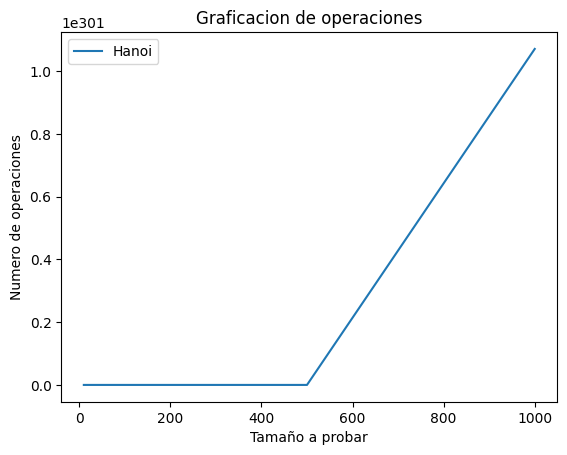

In [27]:
# Import matplotlib para graficar
import matplotlib.pyplot as plt

# Python3 program for iterative Tower of Hanoi
import sys

# A structure to represent a stack
class Stack:
    # Constructor to set the data of
    # the newly created tree node
    def __init__(self, capacity):
        self.capacity = capacity
        self.top = -1
        self.array = [0]*capacity

# function to create a stack of given capacity.
def createStack(capacity):
    stack = Stack(capacity)
    return stack
  
# Stack is full when top is equal to the last index
def isFull(stack):
    return (stack.top == (stack.capacity - 1))
   
# Stack is empty when top is equal to -1
def isEmpty(stack):
    return (stack.top == -1)
   
# Function to add an item to stack.
# It increases top by 1
def push(stack, item):
    if(isFull(stack)):
        return
    stack.top+=1
    stack.array[stack.top] = item
   
# Function to remove an item from stack.
# It decreases top by 1
def Pop(stack):
    if(isEmpty(stack)):
        return -sys.maxsize
    Top = stack.top
    stack.top-=1
    return stack.array[Top]

# Function to implement legal
# movement between two poles
def moveDisksBetweenTwoPoles(src, dest, s, d, contador, operaciones):
    pole1TopDisk = Pop(src)
    pole2TopDisk = Pop(dest)
 
    # When pole 1 is empty
    if (pole1TopDisk == -sys.maxsize):
        push(src, pole2TopDisk)
        moveDisk(d, s, pole2TopDisk)
        contador += 1
       
    # When pole2 pole is empty
    elif (pole2TopDisk == -sys.maxsize):
        push(dest, pole1TopDisk)
        moveDisk(s, d, pole1TopDisk)
        contador += 1
       
    # When top disk of pole1 > top disk of pole2
    elif (pole1TopDisk > pole2TopDisk):
        push(src, pole1TopDisk)
        push(src, pole2TopDisk)
        moveDisk(d, s, pole2TopDisk)
        contador += 1
       
    # When top disk of pole1 < top disk of pole2
    else:
        push(dest, pole2TopDisk)
        push(dest, pole1TopDisk)
        moveDisk(s, d, pole1TopDisk)
        contador += 1
        
    operaciones.append(contador)
    return contador
   
# Function to show the movement of disks
def moveDisk(fromPeg, toPeg, disk):
    print("Move the disk", disk, "from '", fromPeg, "' to '", toPeg, "'")
   
# Function to implement TOH puzzle
def tohIterative(num_of_disks, src, aux, dest):
    s, d, a = 'S', 'D', 'A'
    contador = 0
    operaciones = []
   
    # If number of disks is even, then interchange
    # destination pole and auxiliary pole
    if (num_of_disks % 2 == 0):
        temp = d
        d = a
        a = temp
    total_num_of_moves = int(pow(2, num_of_disks) - 1)
   
    # Larger disks will be pushed first
    for i in range(num_of_disks, 0, -1):
        push(src, i)
   
    for i in range(1, total_num_of_moves + 1):
        if (i % 3 == 1):
            contador = moveDisksBetweenTwoPoles(src, dest, s, d, contador, operaciones)
   
        elif (i % 3 == 2):
            contador = moveDisksBetweenTwoPoles(src, aux, s, a, contador, operaciones)
   
        elif (i % 3 == 0):
            contador = moveDisksBetweenTwoPoles(aux, dest, a, d, contador, operaciones)
    
num_of_disks = 10
src = createStack(num_of_disks)
aux = createStack(num_of_disks)
dest = createStack(num_of_disks)
tohIterative(num_of_disks, src, aux, dest)

sizes = [10, 50, 100, 300, 500, 1000]
tams_Hanoi=[1023, 1125899906842624, 1267650600228229401496703205376, 531691198313966349161522824112137830527000671303424,  3.273390607896142e+149, 10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376]

plt.plot(sizes,tams_Hanoi,label='Hanoi')

plt.xlabel('Tamaño a probar')
plt.ylabel('Numero de operaciones')
plt.title('Graficacion de operaciones')
plt.legend()
plt.show()

***
# Problema de josefo

For 10 people, the winning child is 5 with 9 operations.
For 50 people, the winning child is 37 with 49 operations.
For 100 people, the winning child is 73 with 99 operations.
For 300 people, the winning child is 89 with 299 operations.
For 500 people, the winning child is 489 with 499 operations.
For 1000 people, the winning child is 977 with 999 operations.


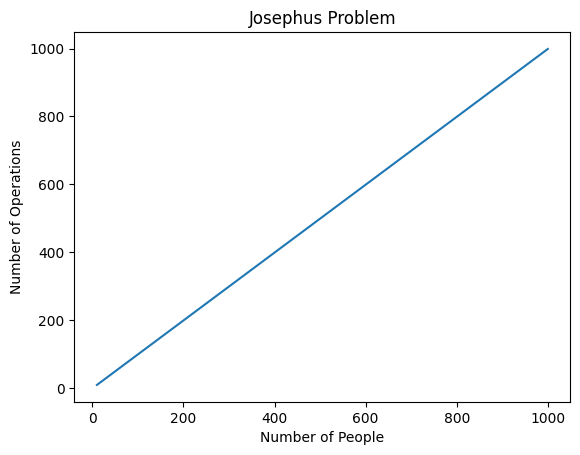

In [28]:
# Function for finding the winning child and counting operations.
def find(n, k):
 
    sum = 0
    count = 0
 
    # For finding out the removed
    # chairs in each iteration
    for i in range(2,n+1):
        sum = (sum + k) % i
        count += 1
 
    return sum + 1, count

# Test different sizes and count operations.
sizes = [10, 50, 100, 300, 500, 1000]
counts = []
for size in sizes:
    n, k = size, 2
    result, count = find(n, k)
    counts.append(count)
    print("For", size, "people, the winning child is", result, "with", count, "operations.")

# Plot the counts against the sizes.
plt.plot(sizes, counts)
plt.xlabel('Number of People')
plt.ylabel('Number of Operations')
plt.title('Josephus Problem')
plt.show()

***
# Problema del intervalo de existencias

1 1 2 4 5 1 For input size of 10 the function took 46 operations.
For input size of 50 the function took 1226 operations.
For input size of 100 the function took 4951 operations.
For input size of 300 the function took 44851 operations.
For input size of 500 the function took 124751 operations.
For input size of 1000 the function took 499501 operations.


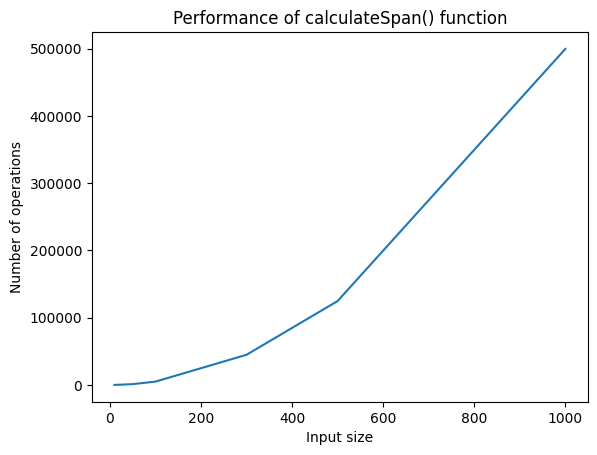

In [29]:
# Python3 program for brute force method to calculate stock span values
import matplotlib.pyplot as plt
 
# Fills list S[] with span values
 
 
def calculateSpan(price, n, S):
 
    # Span value of first day is always 1
    S[0] = 1
 
    # Calculate span value of remaining days by linearly
    # checking previous days
    operations = 1
    for i in range(1, n, 1):
        S[i] = 1   # Initialize span value
 
        # Traverse left while the next element on left is
        # smaller than price[i]
        j = i - 1
        while (j >= 0) and (price[i] >= price[j]):
            S[i] += 1
            j -= 1
            operations += 1
    return operations
 
# A utility function to print elements of array
 
 
def printArray(arr, n):
 
    for i in range(n):
        print(arr[i], end=" ")
 
 
# Driver program to test above function
price = [10, 4, 5, 90, 120, 80]
n = len(price)
S = [None] * n
 
# Fill the span values in list S[]
calculateSpan(price, n, S)
 
# print the calculated span values
printArray(S, n)

# Testing the function with different input sizes
input_sizes = [10, 50, 100, 300, 500, 1000]
operations_array = []
for size in input_sizes:
    price = [i for i in range(size)]
    S = [None] * size
    operations = calculateSpan(price, size, S)
    operations_array.append(operations)
    print("For input size of", size, "the function took", operations, "operations.")

# Plotting the number of operations against the input size
plt.plot(input_sizes, operations_array)
plt.xlabel('Input size')
plt.ylabel('Number of operations')
plt.title('Performance of calculateSpan() function')
plt.show()


***
# Graficaciones

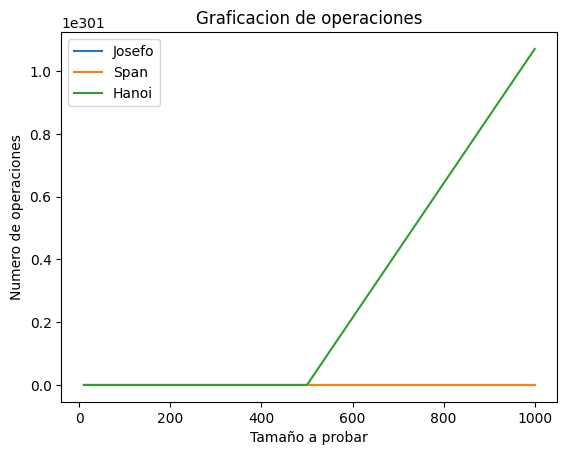

In [30]:
tams_Josefo=[9,49,99,299,499,999]
tams_Span=[46,1226,4951,44851,124751,499501]
tams_Hanoi=[1023, 1125899906842624, 1267650600228229401496703205376, 531691198313966349161522824112137830527000671303424,  3.273390607896142e+149, 10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376]


plt.plot(sizes,tams_Josefo,label='Josefo')
plt.plot(sizes,tams_Span,label='Span')
plt.plot(sizes,tams_Hanoi,label='Hanoi')
plt.xlabel('Tamaño a probar')
plt.ylabel('Numero de operaciones')
plt.title('Graficacion de operaciones')
plt.legend()
plt.show()

***
# Tabulaciones

In [31]:
data = {
    'Existencias': tams_Span,
    'Josefo': tams_Josefo,
    'Hanoi': tams_Hanoi,
    'X': sizes
}

df= pd.DataFrame(data)
df.set_index('X',inplace=True)
df

,Existencias,Josefo,Hanoi
X,,,
10,46,9,1023
50,1226,49,1125899906842624
100,4951,99,1267650600228229401496703205376
300,44851,299,5316911983139663491615228241121378305270006713...
500,124751,499,3273390607896142051722870770729321789547594018...
1000,499501,999,1071508607186267320948425049060001810561404811...
